In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_excel(r'C:\Users\Aditya\OneDrive\Documents\flight\Data_Train.xlsx')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test_data=pd.read_excel(r"C:\Users\Aditya\OneDrive\Documents\flight\Test_set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
train_data.shape

(10683, 11)

In [6]:
test_data.shape

(2671, 10)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [11]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [12]:
#date is in the form of object i can seperate date into day month and year
train_data["date"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day
train_data["month"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.month
train_data["year"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.year
#for test data
test_data["date"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["month"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.month
test_data["year"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.year

In [13]:
train_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019


In [14]:
test_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,date,month,year
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019


In [15]:
#splitting hours and minutes in arrival and departure time 
train_data["Dep_hour"] = pd.to_datetime(train_data.Dep_Time).dt.hour
train_data["Dep_minute"] = pd.to_datetime(train_data.Dep_Time).dt.minute
#for test data
test_data["Dep_hour"] = pd.to_datetime(test_data.Dep_Time).dt.hour
test_data["Dep_minute"] = pd.to_datetime(test_data.Dep_Time).dt.minute

In [16]:
train_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,Dep_hour,Dep_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20


In [17]:
test_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,date,month,year,Dep_hour,Dep_minute
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019,17,30


In [18]:
#splitting hours and minutes in arrival and departure time 
train_data["arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data["arrival_minute"] = pd.to_datetime(train_data.Arrival_Time).dt.minute
#for test data
test_data["arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data["arrival_minute"] = pd.to_datetime(test_data.Arrival_Time).dt.minute


In [19]:
train_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,Dep_hour,Dep_minute,arrival_hour,arrival_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10


In [20]:
test_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,date,month,year,Dep_hour,Dep_minute,arrival_hour,arrival_minute
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019,17,30,25,25


In [21]:
#removing original columns
train_data.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)
test_data.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [22]:
train_data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,Dep_hour,Dep_minute,arrival_hour,arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10


In [23]:
#i can seperate duration into duration hours and duration mins and make new features and add to the date frame
train_data['duration_hour']=train_data['Duration'].str.split(' ').str[0].str.split('h').str[0]
train_data['duration_min']=train_data['Duration'].str.split(' ').str[1].str.split('m').str[0]
test_data['duration_hour']=test_data['Duration'].str.split(' ').str[0].str.split('h').str[0]
test_data['duration_min']=test_data['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [24]:
train_data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,Dep_hour,Dep_minute,arrival_hour,arrival_minute,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50


In [25]:
test_data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,date,month,year,Dep_hour,Dep_minute,arrival_hour,arrival_minute,duration_hour,duration_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,2019,17,30,25,25,10,55


In [26]:
#remove original columns
train_data.drop('Duration',axis=1,inplace=True)
test_data.drop('Duration',axis=1,inplace=True)

In [27]:
print(train_data.shape)
print(test_data.shape)

(10683, 16)
(2671, 15)


In [28]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [29]:
test_data['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [30]:
#i can replace non stop=0, 1 stop=1,2stop=2,3stops=3,4stops=4 by using map 
train_data['Total_Stops']=train_data['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
test_data['Total_Stops']=test_data['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [31]:
train_data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,date,month,year,Dep_hour,Dep_minute,arrival_hour,arrival_minute,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662,1,5,2019,5,50,13,15,7,25


In [32]:
test_data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,date,month,year,Dep_hour,Dep_minute,arrival_hour,arrival_minute,duration_hour,duration_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,No info,6,6,2019,17,30,25,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1,No info,12,5,2019,6,20,20,20,4,NaN


In [33]:
#already we have source and destination and no of stops, route is nothing but combination of all these so i remove this feature
train_data.drop('Route',axis=1,inplace=True)
test_data.drop('Route',axis=1,inplace=True)

In [34]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,Dep_hour,Dep_minute,arrival_hour,arrival_minute,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,0.0,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2.0,No info,13882,9,6,2019,9,25,4,25,19,NaN
3,IndiGo,Kolkata,Banglore,1.0,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1.0,No info,13302,1,3,2019,16,50,21,35,4,45


In [35]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,date,month,year,Dep_hour,Dep_minute,arrival_hour,arrival_minute,duration_hour,duration_min
0,Jet Airways,Delhi,Cochin,1,No info,6,6,2019,17,30,25,25,10,55
1,IndiGo,Kolkata,Banglore,1,No info,12,5,2019,6,20,20,20,4,NaN
2,Jet Airways,Delhi,Cochin,1,In-flight meal not included,21,5,2019,19,15,0,0,23,45
3,Multiple carriers,Delhi,Cochin,1,No info,21,5,2019,8,0,0,0,13,NaN
4,Air Asia,Banglore,Delhi,0,No info,24,6,2019,23,55,45,45,2,50


In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Source           10683 non-null  object 
 2   Destination      10683 non-null  object 
 3   Total_Stops      10682 non-null  float64
 4   Additional_Info  10683 non-null  object 
 5   Price            10683 non-null  int64  
 6   date             10683 non-null  int64  
 7   month            10683 non-null  int64  
 8   year             10683 non-null  int64  
 9   Dep_hour         10683 non-null  int64  
 10  Dep_minute       10683 non-null  int64  
 11  arrival_hour     10683 non-null  int64  
 12  arrival_minute   10683 non-null  int64  
 13  duration_hour    10683 non-null  object 
 14  duration_min     9651 non-null   object 
dtypes: float64(1), int64(8), object(6)
memory usage: 1.2+ MB


In [37]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Source           2671 non-null   object
 2   Destination      2671 non-null   object
 3   Total_Stops      2671 non-null   int64 
 4   Additional_Info  2671 non-null   object
 5   date             2671 non-null   int64 
 6   month            2671 non-null   int64 
 7   year             2671 non-null   int64 
 8   Dep_hour         2671 non-null   int64 
 9   Dep_minute       2671 non-null   int64 
 10  arrival_hour     2671 non-null   int64 
 11  arrival_minute   2671 non-null   int64 
 12  duration_hour    2671 non-null   object
 13  duration_min     2417 non-null   object
dtypes: int64(8), object(6)
memory usage: 292.3+ KB


In [38]:
#since it could not convert into int64 type because 5m is present in the data
train_data[train_data['duration_hour']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,Dep_hour,Dep_minute,arrival_hour,arrival_minute,duration_hour,duration_min
6474,Air India,Mumbai,Hyderabad,2.0,No info,17327,6,3,2019,16,50,16,55,5m,NaN


In [39]:
test_data[train_data['duration_hour']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,date,month,year,Dep_hour,Dep_minute,arrival_hour,arrival_minute,duration_hour,duration_min


In [40]:
#in the train_data duration is 5min it is not make sence so we can remove the row 
train_data.drop(index=6474,axis=0,inplace=True)

In [41]:
#before converting object to int we have to check null values 
train_data.isnull().sum()

Airline               0
Source                0
Destination           0
Total_Stops           1
Additional_Info       0
Price                 0
date                  0
month                 0
year                  0
Dep_hour              0
Dep_minute            0
arrival_hour          0
arrival_minute        0
duration_hour         0
duration_min       1031
dtype: int64

In [42]:
test_data.isnull().sum()

Airline              0
Source               0
Destination          0
Total_Stops          0
Additional_Info      0
date                 0
month                0
year                 0
Dep_hour             0
Dep_minute           0
arrival_hour         0
arrival_minute       0
duration_hour        0
duration_min       254
dtype: int64

In [43]:
#replace nan with zeros
train_data['duration_min']=train_data['duration_min'].replace(np.nan,0)
test_data['duration_min']=test_data['duration_min'].replace(np.nan,0)


In [44]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,Dep_hour,Dep_minute,arrival_hour,arrival_minute,duration_hour,duration_min
9039,Air India,Delhi,Cochin,NaN,No info,7480,6,5,2019,9,45,9,25,23,40


In [45]:
#remove the nan value
train_data.drop(index=9039,axis=0,inplace=True)

In [46]:
train_data.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
date               0
month              0
year               0
Dep_hour           0
Dep_minute         0
arrival_hour       0
arrival_minute     0
duration_hour      0
duration_min       0
dtype: int64

In [47]:
test_data.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
date               0
month              0
year               0
Dep_hour           0
Dep_minute         0
arrival_hour       0
arrival_minute     0
duration_hour      0
duration_min       0
dtype: int64

In [48]:
#free from null values

In [49]:
#even columns are having numerical values dtypes are in object we have to convert it into numeric form
#train_data
train_data.duration_hour=train_data.duration_hour.astype('int')
train_data.duration_min=train_data.duration_min.astype('int')
#test_data
test_data.duration_hour=train_data.duration_hour.astype('int')
test_data.duration_min=train_data.duration_min.astype('int')

In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10681 non-null  object 
 1   Source           10681 non-null  object 
 2   Destination      10681 non-null  object 
 3   Total_Stops      10681 non-null  float64
 4   Additional_Info  10681 non-null  object 
 5   Price            10681 non-null  int64  
 6   date             10681 non-null  int64  
 7   month            10681 non-null  int64  
 8   year             10681 non-null  int64  
 9   Dep_hour         10681 non-null  int64  
 10  Dep_minute       10681 non-null  int64  
 11  arrival_hour     10681 non-null  int64  
 12  arrival_minute   10681 non-null  int64  
 13  duration_hour    10681 non-null  int32  
 14  duration_min     10681 non-null  int32  
dtypes: float64(1), int32(2), int64(8), object(4)
memory usage: 1.5+ MB


In [51]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Source           2671 non-null   object
 2   Destination      2671 non-null   object
 3   Total_Stops      2671 non-null   int64 
 4   Additional_Info  2671 non-null   object
 5   date             2671 non-null   int64 
 6   month            2671 non-null   int64 
 7   year             2671 non-null   int64 
 8   Dep_hour         2671 non-null   int64 
 9   Dep_minute       2671 non-null   int64 
 10  arrival_hour     2671 non-null   int64 
 11  arrival_minute   2671 non-null   int64 
 12  duration_hour    2671 non-null   int32 
 13  duration_min     2671 non-null   int32 
dtypes: int32(2), int64(8), object(4)
memory usage: 271.4+ KB


In [52]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,Dep_hour,Dep_minute,arrival_hour,arrival_minute,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,0.0,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2.0,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1.0,No info,13302,1,3,2019,16,50,21,35,4,45


In [53]:
cat_data=train_data.dtypes[train_data.dtypes=='object'].index
cat_data

Index(['Airline', 'Source', 'Destination', 'Additional_Info'], dtype='object')

In [54]:
num_data=train_data.dtypes[train_data.dtypes=='int64'].index
num_data1=train_data.dtypes[train_data.dtypes=='int32'].index
flt_data=train_data.dtypes[train_data.dtypes=='float64'].index
num_data=num_data.append(flt_data)
num_data=num_data.append(num_data1)
num_data

Index(['Price', 'date', 'month', 'year', 'Dep_hour', 'Dep_minute',
       'arrival_hour', 'arrival_minute', 'Total_Stops', 'duration_hour',
       'duration_min'],
      dtype='object')

# univariate analysis

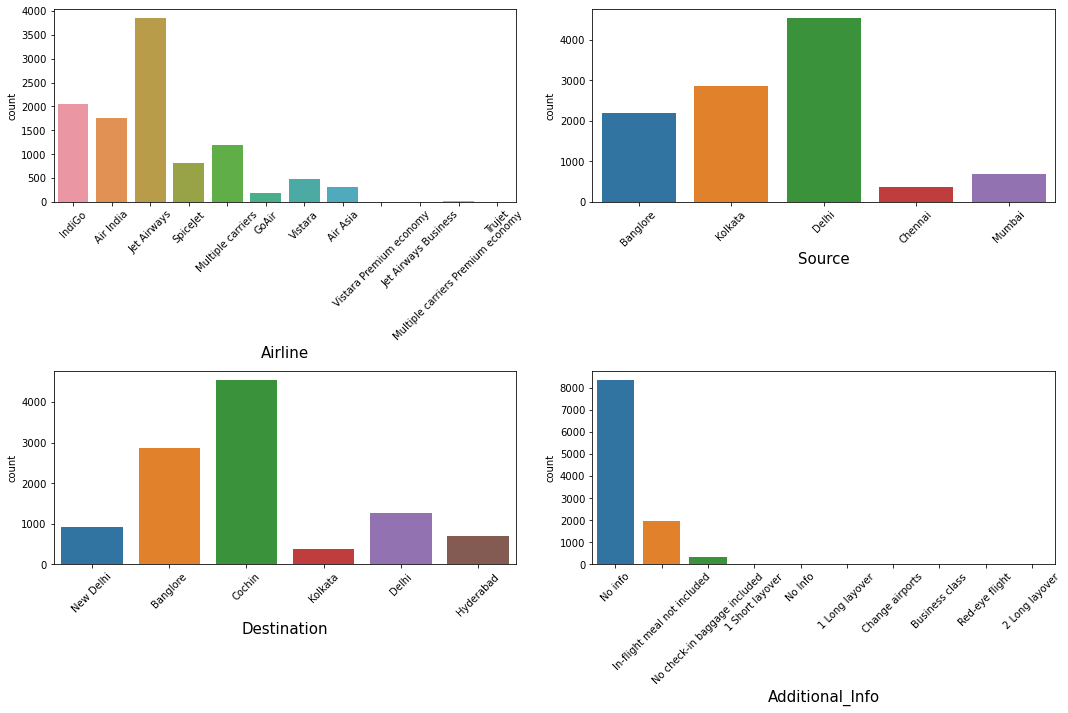

In [55]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in train_data[cat_data]:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.countplot(train_data[cat_data][column])
        plt.xlabel(column,fontsize=15)
        plt.xticks(rotation=45)
        
    plotnumber+=1
    
plt.tight_layout()

In [55]:
#observation:-
#AirLines:-jetairways has highest count and we can say jet airways is the most preferred airways followed by indigo and air india
#source:-most of the flights are take off from delhi and least are from chennai
#destination:-most of the filights are lading in cochin and least are kolkatha
#Additional info:-No info has highest count comapring with other ones so thre is no information means it not contributing our model prediction 
train_data.drop('Additional_Info',axis=1,inplace=True)#since 80% of the data is no info
test_data.drop('Additional_Info',axis=1,inplace=True)#since 80% of the data is no info

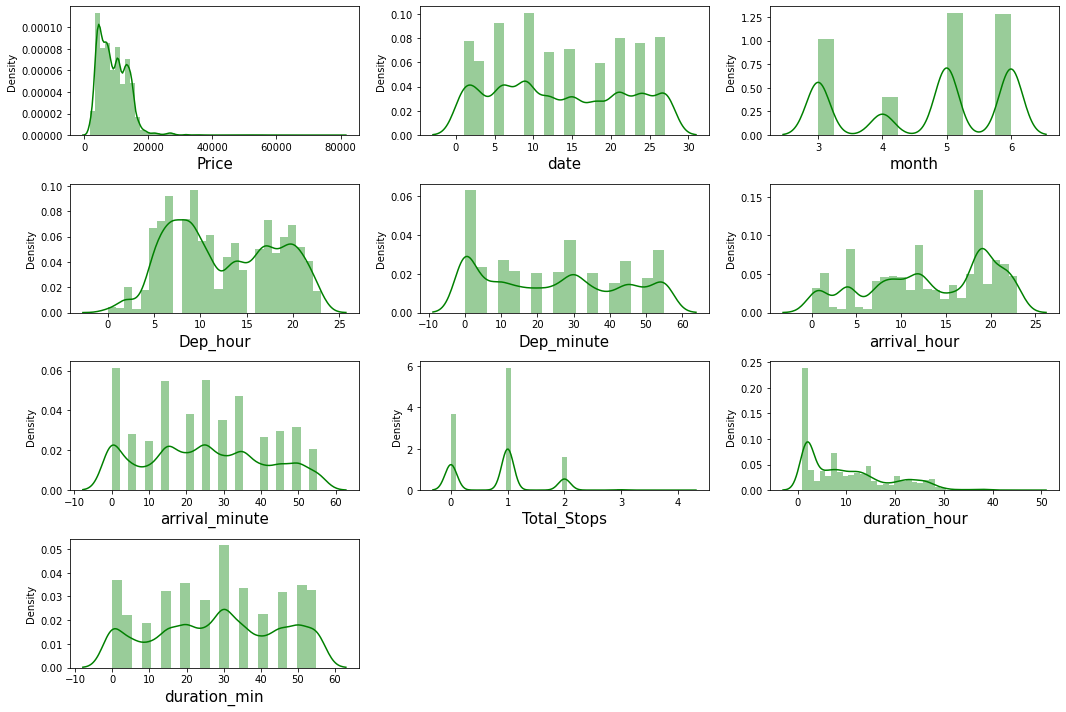

In [190]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in train_data[num_data]:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(train_data[num_data][column],color='green')
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
    
plt.tight_layout()

In [ ]:
#price is skewed right due to ticket prices are not same to all the airlines prices are increasing +vely
#there is no specific date for travel so we cannot say particular date is important
#journey in the month of ma and june are looks high and in the month of april is low 
#dep hour is from the plot we can see that most of the flight are takes off in the morning and also between
#time 16:00 to 23:00 is also high 
#dep minutes are most of flights are takes of between minutes of 0 to 8
#most of the flights are arrived in the evening since they start journey in the morning
#arr min are almost carrying same importance
#total stops flights with one stop are high comparing to other stops and also 4 stops are very less we can say only one 
#duration_hour most of journey duration is 1,2,3 hours 



In [56]:
#we have smae year data so year same for all the data it not important to us so i can drop it
train_data.drop('year',axis=1,inplace=True)
test_data.drop('year',axis=1,inplace=True)

# Bivariate analysis

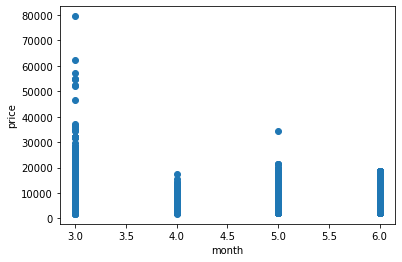

In [128]:
plt.scatter(y='Price',x='month',data=train_data)
plt.ylabel('price')
plt.xlabel('month')
plt.show()

In [ ]:
#obseravations:-
#price is very high in 3 month and little high in 5 month also in the 4 and 6 month price is remains constant

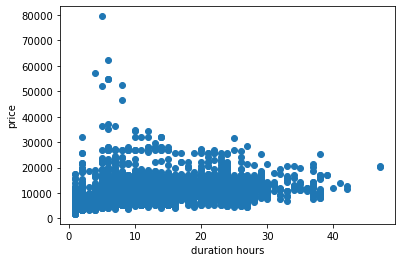

In [129]:
plt.scatter(y='Price',x='duration_hour',data=train_data)
plt.ylabel('price')
plt.xlabel('duration hours')
plt.show()

In [ ]:
#observation:-
#price range from 10k -20k is more and duration hours also 1h-3h

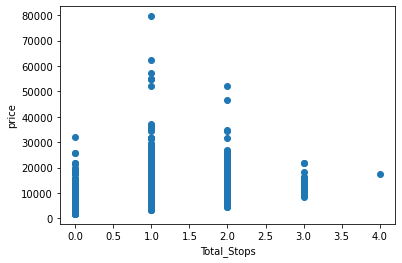

In [64]:
plt.scatter(y='Price',x='Total_Stops',data=train_data)
plt.ylabel('price')
plt.xlabel('Total_Stops')
plt.show()

In [ ]:
#observation:-
#1 stop has high price compared to other prices with no of stops and 2stops ,0stops and 3stops are follows

In [57]:
test_data.nunique()

Airline           11
Source             5
Destination        6
Total_Stops        5
date              10
month              4
Dep_hour          24
Dep_minute        12
arrival_hour      12
arrival_minute    12
duration_hour     37
duration_min      12
dtype: int64

In [58]:
train_data.nunique()

Airline             12
Source               5
Destination          6
Total_Stops          5
Price             1870
date                10
month                4
Dep_hour            24
Dep_minute          12
arrival_hour        24
arrival_minute      12
duration_hour       43
duration_min        12
dtype: int64

In [ ]:
#observation:-
#1 stop has contains high count and also it has high price also comparing with other stops  

# encoding the categorical data

In [59]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,date,month,Dep_hour,Dep_minute,arrival_hour,arrival_minute,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1.0,13302,1,3,16,50,21,35,4,45


In [60]:
tr1=pd.get_dummies(train_data[['Airline','Source','Destination']],drop_first=True)
ts1=pd.get_dummies(test_data[['Airline','Source','Destination']],drop_first=True)

In [61]:
tr1

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [62]:
ts1

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2667,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2668,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2669,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [63]:
train_df=pd.concat([train_data,tr1],axis=1)
test_df=pd.concat([test_data,ts1],axis=1)

In [64]:
train_df.shape

(10681, 33)

In [65]:
test_df.shape

(2671, 31)

In [66]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,date,month,Dep_hour,Dep_minute,arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2.0,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1.0,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [67]:
test_data.head()

,Airline,Source,Destination,Total_Stops,date,month,Dep_hour,Dep_minute,arrival_hour,arrival_minute,duration_hour,duration_min
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,25,25,2,50
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,20,20,7,25
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,0,0,19,0
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,0,0,5,25
4,Air Asia,Banglore,Delhi,0,24,6,23,55,45,45,4,45


In [68]:
#drop the original columns
train_df.drop(['Airline','Source','Destination'],axis=1,inplace=True)
test_df.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [69]:
train_df.head()

,Total_Stops,Price,date,month,Dep_hour,Dep_minute,arrival_hour,arrival_minute,duration_hour,duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2.0,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2.0,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1.0,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1.0,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [70]:
test_df.head()

,Total_Stops,date,month,Dep_hour,Dep_minute,arrival_hour,arrival_minute,duration_hour,duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,25,25,2,50,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,20,20,7,25,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,0,0,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,0,0,5,25,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,45,45,4,45,0,...,0,0,0,0,0,0,1,0,0,0


# checking correlation with variable vs variable

<AxesSubplot:>

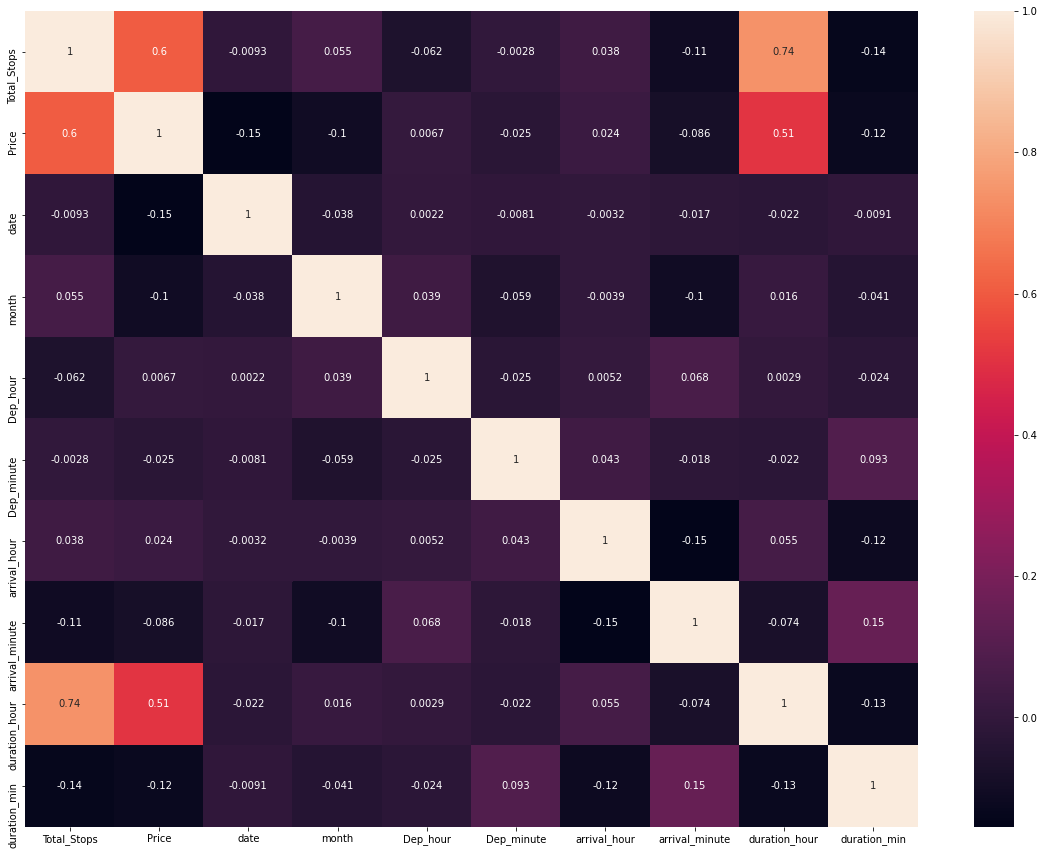

In [64]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.corr(),annot=True,linecolor='black')

In [ ]:
#observation:-
#duration hour and total stops features are correlating with each other but not too much 

# correlation with target variable

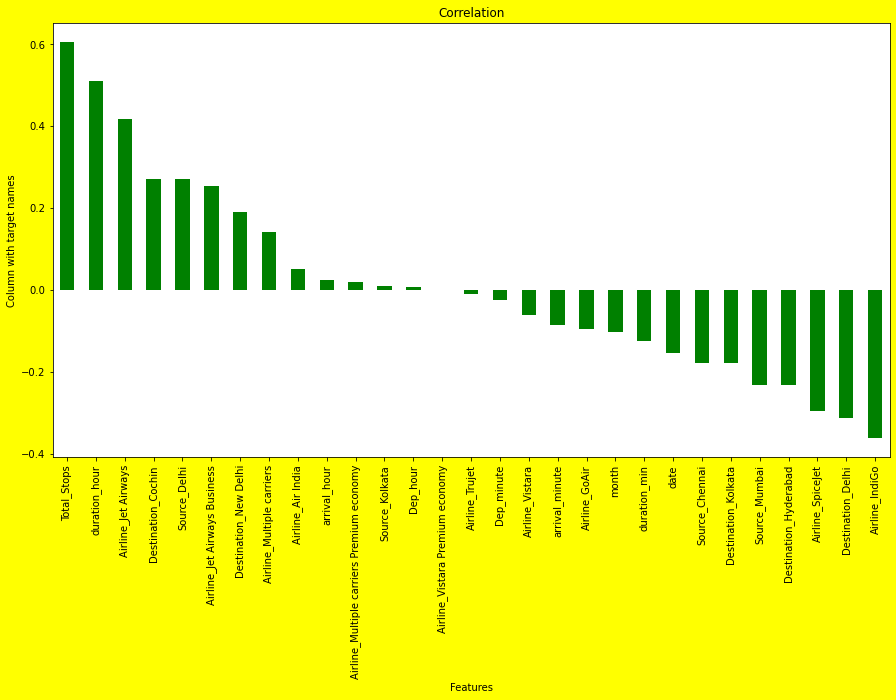

In [226]:
plt.figure(figsize =(15, 8),facecolor='yellow')
train_df.corr()['Price'].sort_values(ascending = False).drop(['Price']).plot(kind ='bar', color ='green')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()


# checking outliers

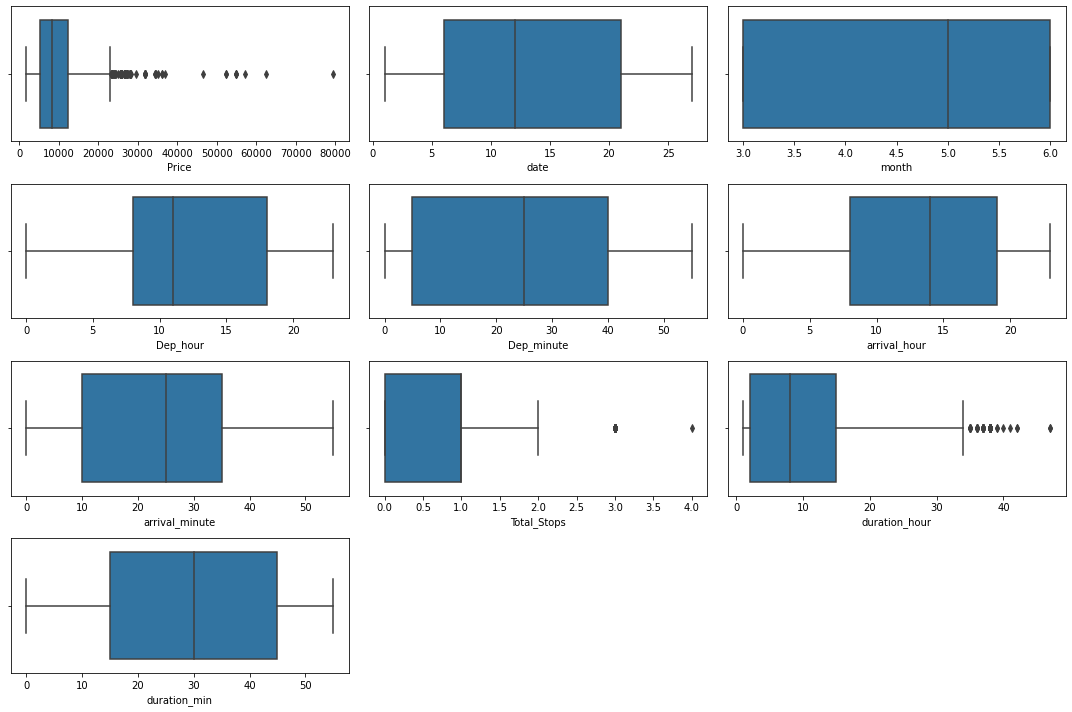

In [227]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in train_df[num_data]:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(train_df[num_data][column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
    
plt.tight_layout()

In [ ]:
#observation:-
#outliers are present in price due to some of the bussiness class flight price is very hihg we cannot say these are an outliers and also i do not remove this data

#total stops also has outliers because most of the stops are belongs to 1,2 so 4 stops are showing as outlier but it is also important data for us

#duration hours has also outliers because due to no of stops increases duration is also increase 

In [152]:
train_df.skew()

Total_Stops                                    0.317224
Price                                          1.813100
date                                           0.117998
month                                         -0.387625
Dep_hour                                       0.113075
Dep_minute                                     0.167415
arrival_hour                                  -0.370033
arrival_minute                                 0.110928
duration_hour                                  0.851156
duration_min                                  -0.090842
Airline_Air India                              1.816673
Airline_GoAir                                  7.217328
Airline_IndiGo                                 1.562454
Airline_Jet Airways                            0.581790
Airline_Jet Airways Business                  42.162383
Airline_Multiple carriers                      2.461381
Airline_Multiple carriers Premium economy     28.615496
Airline_SpiceJet                               3

In [153]:
test_df.skew()

Total_Stops                                   0.321364
date                                          0.199540
month                                        -0.403700
Dep_hour                                      0.093759
Dep_minute                                    0.128515
arrival_hour                                  0.115267
arrival_minute                                0.115267
duration_hour                                 0.862049
duration_min                                 -0.100827
Airline_Air India                             1.808687
Airline_GoAir                                 7.425946
Airline_IndiGo                                1.570462
Airline_Jet Airways                           0.695618
Airline_Jet Airways Business                 36.523949
Airline_Multiple carriers                     2.202763
Airline_Multiple carriers Premium economy    29.804900
Airline_SpiceJet                              3.152294
Airline_Vistara                               4.216176
Airline_Vi

In [ ]:
#since price is skewed right so i can use log transformation for handling skewness
#duration hour also skewed right so log transformation works better 

In [71]:
#train_data
train_df['Price']=np.log(train_df['Price'])
train_df['duration_hour']=np.log(train_df['duration_hour'])
#for test data
test_df['duration_hour']=np.log(test_df['duration_hour'])

In [72]:
train_df.skew()

Total_Stops                                    0.317224
Price                                         -0.254727
date                                           0.117998
month                                         -0.387625
Dep_hour                                       0.113075
Dep_minute                                     0.167415
arrival_hour                                  -0.370033
arrival_minute                                 0.110928
duration_hour                                 -0.265994
duration_min                                  -0.090842
Airline_Air India                              1.816673
Airline_GoAir                                  7.217328
Airline_IndiGo                                 1.562454
Airline_Jet Airways                            0.581790
Airline_Jet Airways Business                  42.162383
Airline_Multiple carriers                      2.461381
Airline_Multiple carriers Premium economy     28.615496
Airline_SpiceJet                               3

In [73]:
#split the data into dependent and independent
X=train_df.drop('Price',axis=1)
y=train_data['Price']

# scaling the data by using minmax scaler

In [74]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
x

,Total_Stops,date,month,Dep_hour,Dep_minute,arrival_hour,arrival_minute,duration_hour,duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,-1.220619,1.237192,-1.467619,1.654162,-0.234832,-1.800328,-0.889941,-1.183217,1.278965,-0.442659,...,-0.016762,-0.192329,-0.859163,-0.606305,-0.264016,-0.859163,-0.366532,-0.264016,-0.192329,3.234239
1,1.741761,-1.475375,0.250165,-1.303018,1.363790,-0.050871,-0.586988,0.052294,-0.196456,2.259077,...,-0.016762,-0.192329,-0.859163,1.649335,-0.264016,-0.859163,-0.366532,-0.264016,-0.192329,-0.309192
2,1.741761,-0.531874,1.109057,-0.607211,0.031605,-1.362964,0.018919,1.037072,-1.671877,-0.442659,...,-0.016762,-0.192329,1.163923,-0.606305,-0.264016,1.163923,-0.366532,-0.264016,-0.192329,-0.309192
3,0.260571,-0.178060,0.250165,0.958355,-1.034142,1.407010,0.321872,-0.279545,-0.196456,-0.442659,...,-0.016762,-0.192329,-0.859163,1.649335,-0.264016,-0.859163,-0.366532,-0.264016,-0.192329,-0.309192
4,0.260571,-1.475375,-1.467619,0.610452,1.363790,1.115434,0.624825,-0.499615,0.983881,-0.442659,...,-0.016762,-0.192329,-0.859163,-0.606305,-0.264016,-0.859163,-0.366532,-0.264016,-0.192329,3.234239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,-1.220619,-0.531874,-0.608727,1.132307,1.630227,1.261222,0.018919,-1.183217,0.098628,-0.442659,...,-0.016762,-0.192329,-0.859163,1.649335,-0.264016,-0.859163,-0.366532,-0.264016,-0.192329,-0.309192
10677,-1.220619,1.591005,-0.608727,1.306259,1.097353,1.407010,-0.284035,-1.183217,0.393713,2.259077,...,-0.016762,-0.192329,-0.859163,1.649335,-0.264016,-0.859163,-0.366532,-0.264016,-0.192329,-0.309192
10678,-1.220619,1.591005,-0.608727,-0.781163,-0.234832,-0.342447,-0.284035,-0.783336,-1.671877,-0.442659,...,-0.016762,-0.192329,-0.859163,-0.606305,-0.264016,-0.859163,2.728274,-0.264016,-0.192329,-0.309192
10679,-1.220619,-1.475375,-1.467619,-0.259307,0.298042,0.094917,-0.889941,-1.183217,0.688797,-0.442659,...,-0.016762,-0.192329,-0.859163,-0.606305,-0.264016,-0.859163,-0.366532,-0.264016,-0.192329,3.234239


# model buiding

In [75]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score

In [76]:
#find best random state
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"at random state {i},the training accuracy is:-{r2_score(y_train,pred_train)}")
    print(f"at random state {i},the test accuracy is:-{r2_score(y_test,pred_test)}")

at random state 1,the training accuracy is:-0.6300813216048402
at random state 1,the test accuracy is:-0.6064595162891953
at random state 2,the training accuracy is:-0.6277512220251393
at random state 2,the test accuracy is:--4.68205480193628e+22
at random state 3,the training accuracy is:-0.6280158818547479
at random state 3,the test accuracy is:--2687990135.6997805
at random state 4,the training accuracy is:-0.6220401332223084
at random state 4,the test accuracy is:--5.853444497104133e+19
at random state 5,the training accuracy is:-0.6143398247466123
at random state 5,the test accuracy is:-0.6472936456163079
at random state 6,the training accuracy is:-0.6143397283923537
at random state 6,the test accuracy is:-0.6522321806338693
at random state 7,the training accuracy is:-0.6165018353823651
at random state 7,the test accuracy is:--203237104.40957296
at random state 8,the training accuracy is:-0.6147566037450838
at random state 8,the test accuracy is:-0.645825495786095
at random state 

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25,random_state=62)

In [78]:
lr.fit(x_train,y_train)

LinearRegression()

In [79]:
pred_test=lr.predict(x_test)

In [80]:
print(r2_score(y_test,pred_test))

0.6333765524689559


In [81]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,9):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"at cross fold  {i} the cv_score is {cv_mean} and accuracy score in training data is{train_accuracy} and accuracy score in test is {test_accuracy}")
    print('\n')

at cross fold  2 the cv_score is -1.8768273976280354e+20 and accuracy score in training data is-0.6219563241274408 and accuracy score in test is 0.6333765524689559


at cross fold  3 the cv_score is -3.0505289510651245e+17 and accuracy score in training data is-0.6219563241274408 and accuracy score in test is 0.6333765524689559


at cross fold  4 the cv_score is -8.767178231268223e+22 and accuracy score in training data is-0.6219563241274408 and accuracy score in test is 0.6333765524689559


at cross fold  5 the cv_score is -4282647.310415579 and accuracy score in training data is-0.6219563241274408 and accuracy score in test is 0.6333765524689559


at cross fold  6 the cv_score is -1.7584254900498159e+24 and accuracy score in training data is-0.6219563241274408 and accuracy score in test is 0.6333765524689559


at cross fold  7 the cv_score is -1.6495507825012402e+22 and accuracy score in training data is-0.6219563241274408 and accuracy score in test is 0.6333765524689559


at cross f

In [82]:
def print_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('=======train results===========')
        print(f'accuracy score:{r2_score(y_train,y_pred)*100:2f}%')
        print('\n')
   
    elif train==False:
        pred=clf.predict(x_test)
        print('=======test results=========')
        print(f"r2score is:{r2_score(y_test,pred)*100:2f}%")
        print('\n')

# linear regression

In [83]:
lm=LinearRegression()
lm.fit(x_train,y_train)

print_score(lm,x_train,x_test,y_train,y_test,train=True)
print_score(lm,x_train,x_test,y_train,y_test,train=False)

=======train results===========
accuracy score:62.200436%


=======test results=========
r2score is:63.337655%




# random Forest regressor

In [84]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor()
rfc.fit(x_train,y_train)

print_score(rfc,x_train,x_test,y_train,y_test,train=True)
print_score(rfc,x_train,x_test,y_train,y_test,train=False)


=======train results===========
accuracy score:95.750947%


=======test results=========
r2score is:77.986520%




# GradientBoostingRegressor

In [85]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)

print_score(gbr,x_train,x_test,y_train,y_test,train=True)
print_score(gbr,x_train,x_test,y_train,y_test,train=False)


=======train results===========
accuracy score:79.003988%


=======test results=========
r2score is:78.163004%




# BaggingRegressor

In [86]:
from sklearn.ensemble import BaggingRegressor
bgr=BaggingRegressor()
bgr.fit(x_train,y_train)

print_score(bgr,x_train,x_test,y_train,y_test,train=True)
print_score(bgr,x_train,x_test,y_train,y_test,train=False)

=======train results===========
accuracy score:94.972253%


=======test results=========
r2score is:77.082935%




# DecisionTreeRegressor

In [87]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

print_score(dtr,x_train,x_test,y_train,y_test,train=True)
print_score(dtr,x_train,x_test,y_train,y_test,train=False)

=======train results===========
accuracy score:97.335923%


=======test results=========
r2score is:69.046993%




# xgb regressor

In [88]:
from xgboost import XGBRegressor
xgbr=XGBRegressor()
xgbr.fit(x_train,y_train)

print_score(dtr,x_train,x_test,y_train,y_test,train=True)
print_score(dtr,x_train,x_test,y_train,y_test,train=False)

=======train results===========
accuracy score:97.335923%


=======test results=========
r2score is:69.046993%




In [ ]:
#apart from all the models random forest gives best score

In [89]:
y_pred=rfc.predict(x_train)
pred=rfc.predict(x_test)

In [90]:
#evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('mean absolute error is:',mean_absolute_error(y_test,pred))
print('\n')
print('mean squared error is:',mean_squared_error(y_test,pred))
print('\n')
print('Root mean suared error is:',np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error is: 1187.5694166081744


mean squared error is: 4306303.577092938


Root mean suared error is: 2075.1635061105276


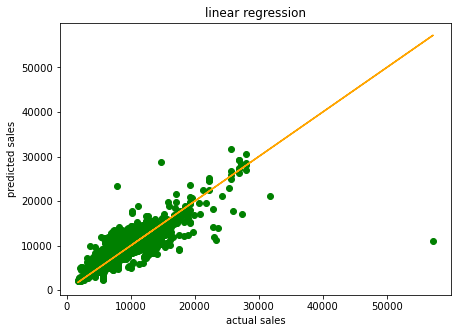

In [91]:
plt.figure(figsize=(7,5))
plt.scatter(x=y_test,y=pred,color='green')
plt.plot(y_test,y_test,color='orange')
plt.xlabel('actual sales')
plt.ylabel('predicted sales')
plt.title('linear regression')
plt.show()

In [92]:
#regularization
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[0.001,1,0.1],'random_state':[1,3,5,6,7,9,8,10]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 1}


In [97]:
ls=Lasso(alpha=1,random_state=1)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)

lss

0.6334208049868479

In [98]:
cv_score=cross_val_score(ls,x,y,cv=15).mean()
cv_score

0.6214029930788616

# hyperparameter tunning

In [89]:
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['squared_error','absolute_error','poisson'],
             'n_estimators': [15,17],
             'max_features':['auto','sqrt','log2'],
             'max_depth':[10,15],
             'min_samples_split': [5,7],
             'min_samples_leaf': [4,5,]}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'squared_error', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 15}


In [99]:
rf=RandomForestRegressor(criterion='squared_error',max_features='auto',max_depth=15,min_samples_leaf=4,min_samples_split=5,n_estimators=15)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

pred=rf.predict(x_test)

rfs=r2_score(y_test,pred)
print('r2score',rfs*100)

rfcscore=cross_val_score(rf,x,y,cv=2).mean()
print('cross validation score is',rfcscore*100)

r2score 80.79529077441371
cross validation score is 77.58332876346756


In [100]:
#save the model
import joblib
joblib.dump(rf,'flight price.obj')

['flight price.obj']

In [101]:
#model predictions
model=joblib.load('fight price.obj')
pred=model.predict(x_test)
predict_values=pd.DataFrame({'actual':y_test,'predict':pred})

In [102]:
predict_values

,actual,predict
6205,10262,10740.544248
7184,13377,10547.443110
3064,12898,12577.932115
1762,19332,13918.292300
6385,6116,4838.985281
...,...,...
730,7485,7305.484762
4529,7229,5697.979019
4657,4668,4706.587179
8606,13377,11886.745105


In [ ]:
#predicting on test set 

In [ ]:
#trujet is extra column in training data but it is not present in test data so i am adding trujet column to test data after i check the predicted values 


In [116]:
test_df['Airline_truejet']=train_df['Airline_Trujet']

In [124]:
test_df['Airline_truejet'].value_counts()

0    2671
Name: Airline_truejet, dtype: int64

In [ ]:
#since it has total zeros so it doesn't harm our model

In [125]:
test_df.isnull().sum()

Total_Stops                                  0
date                                         0
month                                        0
Dep_hour                                     0
Dep_minute                                   0
arrival_hour                                 0
arrival_minute                               0
duration_hour                                0
duration_min                                 0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkat

In [117]:
test_df.head()

,Total_Stops,date,month,Dep_hour,Dep_minute,arrival_hour,arrival_minute,duration_hour,duration_min,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_truejet
0,1,6,6,17,30,25,25,0.693147,50,0,...,0,1,0,0,1,0,0,0,0,0
1,1,12,5,6,20,20,20,1.945910,25,0,...,0,0,1,0,0,0,0,0,0,0
2,1,21,5,19,15,0,0,2.944439,0,0,...,0,1,0,0,1,0,0,0,0,0
3,1,21,5,8,0,0,0,1.609438,25,0,...,0,1,0,0,1,0,0,0,0,0
4,0,24,6,23,55,45,45,1.386294,45,0,...,0,0,0,0,0,1,0,0,0,0


In [119]:
#checking for test data set
model=joblib.load('fight price.obj')
pred=model.predict(test_df)
predict_values=pd.DataFrame({'actual':y_test,'predict':pred})

In [120]:
predict_values

,actual,predict
6205,10262,11196.737336
7184,13377,8313.780952
3064,12898,10777.558655
1762,19332,8065.946251
6385,6116,6511.832116
...,...,...
730,7485,7341.201127
4529,7229,8313.780952
4657,4668,10484.270000
8606,13377,9495.191766
